In [16]:
import sys
mainpath='c:/Kitti/Dropbox/PHD/Gridshells-EQCS' #location of folders
sys.path.insert(0, mainpath+'/Tekno') #location of python files

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import Tekno as tk
import Types as tp
import numpy as np
import Plot as ptk
from scipy.interpolate import UnivariateSpline
from plotly.graph_objs import Layout, Data, Figure, Marker
from plotly.graph_objs import Scatter3d, Scatter, Histogram
from plotly import tools
from plotly.offline import iplot as iplt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from scipy import optimize
import pickle
import pandas as pd
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import Imperfection as imp

In [3]:
import importlib #for reloading
importlib.reload(tk)
import Tekno as tk
importlib.reload(imp)
import Imperfection as imp

# Parameters

materially and geometrically nonlinear finite element analysis to determine the ultimate load of grid shells

grid shells with various span (L), spen-to-height ratio (L/H), grid density (gN) and pipe cross-section sizes (D, T)

to see results either load previously calculated and saved results or run analyses

In [24]:
runNb=49
LperHA = np.zeros(runNb, dtype=np.int16)
gNA    = np.zeros(runNb, dtype=np.int16)
SpanA  = np.zeros(runNb, dtype=np.int16)
DStart = np.zeros(runNb)
DStep  = np.zeros(runNb)
tStart = np.zeros(runNb, dtype=np.int16)
tStep  = np.zeros(runNb, dtype=np.int16)
FA     = np.zeros(runNb)
Data   = np.zeros((runNb,8), dtype=np.int16)

Data[0]  = 10, 20, 60, 200, 100, 20, 5,  -600
Data[1]  = 8,  16, 20, 100, 50,  5,  5,  -150
Data[2]  = 6,  16, 40, 200, 50,  15, 10, -400
Data[3]  = 5,  20, 40, 100, 100, 10, 10, -300
Data[4]  = 4,  16, 20, 50,  50,  5,  10, -300
Data[5]  = 3,  18, 60, 200, 100, 20, 10, -250

Data[6]  = 10, 16, 30, 200, 120, 15, 10, -500*1.5
Data[7]  = 8,  16, 40, 200, 150, 15, 10, -500*1.5
Data[8]  = 6,  20, 50, 150, 100, 15, 10, -500
Data[9] =  5,  18, 50, 200, 50,  20, 10, -130
Data[10] = 4,  20, 40, 100, 50,  15, 10, -400
Data[11] = 3,  18, 30, 120, 40,  10, 10, -300

Data[12] = 10, 10, 30, 200, 100, 15, 10, -500*1.5
Data[13] = 8,  12, 40, 300, 100, 20, 10, -500*1.5
Data[14] = 6,  12, 50, 200, 150, 25, 10, -600*1.5
Data[15] = 5,  14, 50, 200, 150, 25, 10, -500*1.5
Data[16] = 4,  8,  40, 300, 100, 25, 10, -700*1.5
Data[17] = 3,  8,  30, 200, 50,  10, 10, -800

Data[18] = 10, 12, 20, 100, 50,  5, 10,  -100
Data[19] = 8,  12, 30, 100, 100, 20, 10, -500*1.5
Data[20] = 6,  10, 40, 200, 100, 15, 10, -800
Data[21] = 5,  12, 20, 100, 50,  5,  10, -300
Data[22] = 4,  16, 60, 300, 100, 20, 10, -290
Data[23] = 3,  12, 60, 300, 100, 20, 10, -1100

Data[24] = 10, 16, 20, 100, 100, 10, 5,  -200*1.5
Data[25]  = 8,  14, 40, 200, 150, 10, 5,  -250*1.5
Data[26]  = 6,  14, 40, 200, 100, 10, 10, -300
Data[27]  = 5,  14, 40, 200, 150, 10, 10, -250*1.5
Data[28]  = 4,  14, 40, 200, 150, 10, 10, -250*1.5
Data[29]  = 3,  14, 40, 200, 150, 10, 10, -250*1.5

Data[30]  = 10, 18, 20, 100, 50,  10, 5,  -200*1.5
Data[31]  = 8,  18, 60, 250, 150, 35, 5,  -400*1.5
Data[32]  = 6,  18, 20, 100, 50,  10, 10, -200*1.5
Data[33]  = 5,  18, 20, 100, 30,  5,  10, -100
Data[34]  = 4,  18, 20, 100, 50,  10, 10, -200*1.5
Data[35]  = 3,  16, 60, 250, 150, 35, 10, -700*1.5

Data[36]  = 10, 14, 60, 250, 150, 35, 5,  -600*1.5
Data[37]  = 8,  14, 60, 250, 150, 35, 5,  -600*1.5
Data[38]  = 6,  14, 60, 250, 130, 25, 10, -600
Data[39]  = 5,  14, 60, 250, 70,  25, 10, -800
Data[40]  = 4,  14, 60, 250, 100, 20, 10, -850
Data[41]  = 3,  14, 60, 250, 80, 20, 10, -900

Data[42]  = 10, 18, 40, 160, 40, 15, 5,  -250
Data[43]  = 8,  18, 40, 160, 40, 15, 5,  -250
Data[44]  = 6,  18, 40, 150, 40, 15, 10, -250
Data[45]  = 5,  18, 40, 150, 50, 10, 10, -300
Data[46]  = 4,  18, 40, 150, 50, 10, 10, -300
Data[47]  = 3,  16, 40, 150, 50, 10, 10, -400 #1e-12 EnergyIncr Steel04 with -kin -ult with MinMax 20% b=4e-3 (: <3

Data[48]  = 8,  10, 40, 300, 100, 20, 5,  -500

#Data[48]  = 10, 18, 40, 200, 100, 20, 5,  -90 #42 1e-12 EnergyIncr
#Data[49]  = 10, 18, 40, 200, 100, 20, 5,  -90 #42 1e-14 EnergyIncr
#Data[50]  = 10, 18, 40, 200, 100, 20, 5,  -90 #42 1e-8 NormDispIncr
#Data[51]  = 10, 18, 40, 200, 100, 20, 5,  -90 #42 1e-15 EnergyIncr felkemenyedes 1 
#Data[52]  = 10, 18, 40, 200, 100, 20, 5,  -150 #42 1e-14 EnergyIncr felkemenyedes 210 1e3
#Data[53]  = 10, 18, 40, 200, 100, 20, 5,  -150 #42 1e-14 EnergyIncr felkemenyedes 210 1e4
#Data[54]  = 10, 18, 40, 200, 100, 20, 5,  -150 #42 1e-14 EnergyIncr felkemenyedes 210 1e6
#Data[55]  = 10, 18, 40, 200, 100, 20, 5,  -200 #42 1e-14 EnergyIncr felkemenyedes 210 1e7
#Data[56]  = 10, 18, 40, 200, 100, 20, 5,  -200 #42 1e-14 EnergyIncr Steel04 with -kin
#Data[57]  = 10, 18, 40, 200, 100, 20, 5,  -200 #42 1e-12 EnergyIncr Steel04 with -kin
#Data[58]  = 10, 18, 40, 200, 100, 20, 5,  -200 #42 1e-12 EnergyIncr Steel04 with -kin -ult with MinMax 15% b=1e-2
#Data[59]  = 10, 18, 40, 200, 100, 20, 5,  -200 #42 1e-12 EnergyIncr Steel04 with -kin -ult with MinMax 15% b=1e-3
#Data[60]  = 10, 18, 40, 200, 100, 20, 5,  -200 #42 1e-12 EnergyIncr Steel04 with -kin -ult with MinMax 15% b=4e-3
#Data[61]  = 10, 18, 40, 200, 100, 20, 5,  -200 #42 1e-12 EnergyIncr Steel04 with -kin -ult with MinMax 20% b=4e-3 (: <3

for i in range(runNb):
    LperHA[i],gNA[i],SpanA[i],DStart[i],DStep[i],tStart[i],tStep[i],FA[i] = Data[i,0],Data[i,1],Data[i,2],Data[i,3],Data[i,4],Data[i,5],Data[i,6],Data[i,7]

In [25]:
MatNL = True
n=4 # mm CHS cross-section diameter
m=1 # mm CHS cross-section thickness
nb = 4   # number of finite elements along one beam

In [26]:
size = 100
GRSA       = np.zeros(size, dtype=tp.GridShell)
CapacityFA = np.zeros((size, n*m))
CapacityA  = np.zeros((size, n*m))
rhoAA      = np.zeros((size, n*m))
IDA        = np.zeros(size, dtype=np.int16)
etaA       = np.zeros((size, n*m)) 
loadAA     = np.zeros((size, n*m, 201))
dispA      = np.zeros((size, n*m, 201))
CFA        = np.zeros((size, n*m))
CA         = np.zeros((size, n*m))

     L  g  LpH   Lav  L/Lav
----------------------------
 0: 60  20  10   3.2  18.5  4261
 1: 20  16   8   1.4  14.7  2769
 2: 40  16   6   2.8  14.5  2769
 3: 40  20   5   2.2  17.8  4261
 4: 20  16   4   1.4  14.0  2769
 5: 60  18   3   4.0  14.9  3475

 6: 30  16  10   2.0  14.8  2769
 7: 40  16   8   2.7  14.7  2769
 8: 50  20   6   2.8  18.1  4261
 9: 50  18   5   3.1  16.1  3475
10: 40  20   4   2.3  17.4  4261
11: 30  18   3   2.0  14.9  3475

12: 30  10  10   3.2   9.4  1131
13: 40  12   8   3.6  11.1  1597
14: 50  12   6   4.6  10.9  1597
15: 50  14   5   4.0  12.6  2143
16: 40   8   4   5.6   7.1  745
17: 30   8   3   4.4   6.8  745

18: 20  12  10   1.8  11.2  1597
19: 30  12   8   2.7  11.1  1597
20: 40  10   6   4.4   9.2  1131
21: 20  12   5   1.9  10.8  1597
22: 60  16   4   4.3  14.0  2769
23: 60  12   3   6.0  10.0  1597

24: 20  16  10   1.3  14.8  2769
25: 40  14   8   3.1  12.9  2143
26: 40  14   6   3.1  12.7  2143
27: 40  14   5   3.2  12.6  2143
28: 40  14   4   

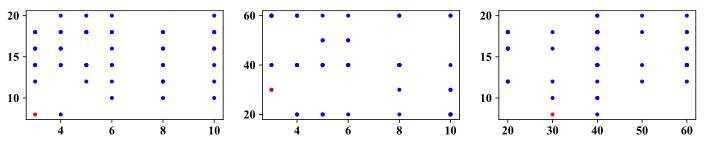

In [7]:
print('     L  g  LpH   Lav  L/Lav')
print('----------------------------')
for i in range(runNb):
    lavtemp,nnn = tk.calclav2(SpanA[i],LperHA[i],gNA[i],2)
    print('{:2d}: {:.0f}  {:2.0f}  {:2.0f}  {:4.1f}  {:4.1f}  {:d}'.format(i,SpanA[i],gNA[i],LperHA[i],lavtemp,SpanA[i]/lavtemp,nnn))
    if i%6==5: print()
plt.figure(figsize=(12,2))
plt.subplot(131)
for i in range(runNb): 
    if SpanA[i]/tk.calclav(SpanA[i],LperHA[i],gNA[i],2)>7.05: plt.plot(LperHA[i],gNA[i],'bo', ms=3) # 
    else: plt.plot(LperHA[i],gNA[i],'ro', ms=3) # 
plt.subplot(132)
for i in range(runNb): 
    if SpanA[i]/tk.calclav(SpanA[i],LperHA[i],gNA[i],2)>7.05: plt.plot(LperHA[i],SpanA[i],'bo', ms=3) # 
    else: plt.plot(LperHA[i],SpanA[i],'ro', ms=3) # 
plt.subplot(133)
for i in range(runNb): 
    if SpanA[i]/tk.calclav(SpanA[i],LperHA[i],gNA[i],2)>7.05: plt.plot(SpanA[i],gNA[i],'bo', ms=3) # 
    else: plt.plot(SpanA[i],gNA[i],'ro', ms=3) # 
plt.show()

# Load results

In [27]:
ga = pickle.load( open( mainpath+"/Saved results/GRSA_OldalnyomasmentesALL_Geom2.p", "rb" ) )
with pd.HDFStore(mainpath+'/Saved results/OldalnyomasmentesALL_Geom2.h5') as store:
    ca = store['CapacityA']
    cf = store['CapacityFA']
    rh = store['rhoAA']
    et = store['etaA']
    l1 = store['loadA1']
    l2 = store['loadA2']
    l3 = store['loadA3']
    l4 = store['loadA4']
    d1 = store['dispA1']
    d2 = store['dispA2']
    d3 = store['dispA3']
    d4 = store['dispA4']

In [28]:
size = 100
GRSA = ga
CapacityA  = ca.values
CapacityFA = cf.values
rhoAA      = rh.values
etaA       = et.values
loadAA     = np.zeros((size, n*m, 201))
loadAA[:,0,:]  = l1.values
loadAA[:,1,:]  = l2.values
loadAA[:,2,:]  = l3.values
loadAA[:,3,:]  = l4.values
dispA      = np.zeros((size, n*m, 201))
dispA[:,0,:]   = d1.values
dispA[:,1,:]   = d2.values
dispA[:,2,:]   = d3.values
dispA[:,3,:]   = d4.values

# Analyses

In [22]:
# LARGE
for i in [0]:
    GRSA[i], CapacityFA[i], CapacityA[i], rhoAA[i], etaA[i], loadAA[i], dispA[i] = tk.loop_analyse2(n, m, LperHA[i], gNA[i], SpanA[i], nb, FA[i], DStart[i], DStep[i], tStart[i], tStep[i],1,2,2,steps=200,msz=0.0001)

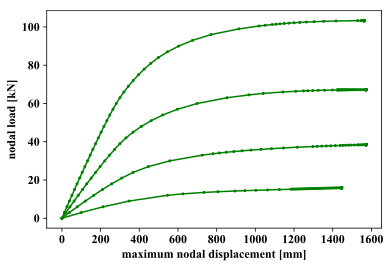

In [22]:
j=0
for i in range(n*m):
    plot = plt.plot(dispA[j,i],loadAA[j,i],'go-', ms=2) # dot plot
plot = plt.xlabel('maximum nodal displacement [mm]')
plot = plt.ylabel('nodal load [kN]')

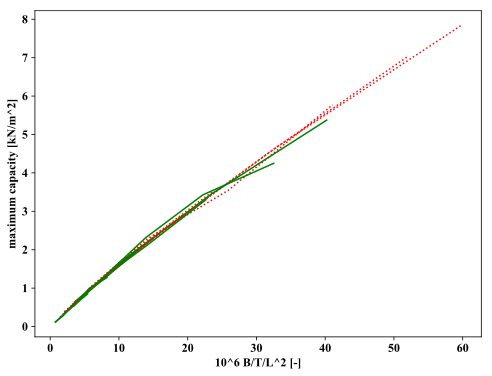

In [181]:
plt.figure(figsize=(8,6))
#c=[1,1.15,1.3,1.4,1.46,1.49]
for i in range(6):
    c[i]=-0.082*LperHAord[i]+1.82 #knock-down factor for span-to-height ratio
for i in range(runNb):
    if GRSA[i]!=0 and GRSA[i].span/GRSA[i].height==10:
        if GRSA[i].span/GRSA[i].Lav>0:
            plt.plot(rhoAA[i]*1e6,CapacityFA[i]/GRSA[i].Lav/GRSA[i].secT/1000,'r:', ms=0) # 
    if GRSA[i]!=0 and GRSA[i].span/GRSA[i].height==4:
        if GRSA[i].span/GRSA[i].Lav>0:
            plt.plot(rhoAA[i]*1e6,CapacityFA[i]/GRSA[i].Lav/GRSA[i].secT/1000/c[i%6],'g', ms=0) # 
plt.xlabel('10^6 B/T/L^2 [-]')
plt.ylabel('maximum capacity [kN/m^2]')
plt.show()

# Viewer

In [ ]:
i=0
iplt(ptk.PlotDef(GRSA[i], 0, DispA[i,:,:], 50, True, False,mode=1))

In [36]:
i=0
iplt(ptk.PlotGeom(GRSA[i], 0))

# Referencia

In [37]:
mar = ['o', '<', 'D', 'v', 'X', '>','s']
LperHAord=np.array([LperHA[0],LperHA[1], LperHA[2], LperHA[3], LperHA[4], LperHA[5]])
c=np.zeros(6)
for i in range(6):
    #c[i]=-0.064*LperHAord[i]+1.64 #knock-down factor for span-to-height ratio
    #c[i]=-0.073*LperHAord[i]+1.74 #knock-down factor for span-to-height ratio
    c[i]=-0.082*LperHAord[i]+1.82 #knock-down factor for span-to-height ratio
Cmax=20
Cmin=3
c1=[c/255. for c in [213., 94., 0.]] # vermillion
c2=[c/255. for c in [0, 158, 115]] # bluish green
c3=[c/255. for c in [240, 228, 66]]  # yellow
c4=[c/255. for c in [0, 114, 178]]   # blue
c5=[c/255. for c in [204, 121, 167]] # reddish purple
c6=[c/255. for c in [86, 180, 233]] # sky blue
#c1=[c/255. for c in [230, 159, 0]]   # orange
col=[c1,c2,c3,c4,c5,c6]

[ 0.157]


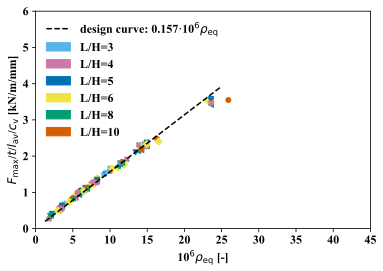

In [38]:
fig = plt.figure(figsize=(6, 4))
#gs = gridspec.GridSpec(1, 2)

#ax1 = plt.subplot(gs[0, 0])
#for i in range(runNb-2):
#    jmax=4
#    for j in range(4):
#        if CapacityA[i,j]>Cmax: jmax=j
#    plt.plot(rhoAA[i,:jmax] *1e6, CapacityFA[i,:jmax] /GRSA[i].secT/1000 / GRSA[i].Lav, color=col[i%6], marker='o',linestyle='-', ms=2)
        
#plt.xlabel('$\\rho_{\\rm eq}=B/T/L^2$ $10^6$ [-]')
#plt.ylabel('$F_{\\rm max}$/$t$/$l_{\\rm av}$ [kN/m/mm]')
#plt.xlim(0,35)
#plt.ylim(0,6)
#plt.xticks(np.arange(0,35.1,5))

#ax2 = plt.subplot(gs[0, 1])   
refx=np.zeros(runNb*4+1)
refy=np.zeros(runNb*4+1)
k=0
for i in range(runNb-2):
    for j in range(n*m):
        if CapacityA[i,j]>=Cmin and CapacityA[i,j]<=Cmax and GRSA[i].span/GRSA[i].Lav>=7:
                k+=1
                refx[k]=rhoAA[i,j]
                refy[k]=CapacityFA[i,j] /GRSA[i].secT/1000 / GRSA[i].Lav /c[(i)%6]
                plt.plot(rhoAA[i,j] *1e6, CapacityFA[i,j] /GRSA[i].secT/1000 / GRSA[i].Lav /c[(i)%6], color=col[i%6], marker=mar[i%6], ms=5) 

keys=np.argsort(refx)
refx=refx[keys]
refy=refy[keys]

def linf(x, a1):
    return a1*x

params, params_covariance = optimize.curve_fit(linf, refx* 1e6, refy)
refxlin=np.linspace(0,25,100)
params[0]=0.157#az illesztessel nagyon magas lett az atlaghiba, vszleg a nagy rho ertekek miatt
plt.plot(refxlin[5:],linf(refxlin[5:],params[0]),'k--')
print(params)

plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('$F_{\\rm max}$/$t$/$l_{\\rm av}$/$c_{\\rm v}$ [kN/m/mm]')
plt.xlim(0,45)
plt.ylim(0,6)
plt.xticks(np.arange(0,45.1,5))

c_patch = mpatches.Patch(color=c6, label='L/H=3')
m_patch = mpatches.Patch(color=c5, label='L/H=4')
b_patch = mpatches.Patch(color=c4, label='L/H=5')
y_patch = mpatches.Patch(color=c3, label='L/H=6')
g_patch = mpatches.Patch(color=c2, label='L/H=8')
r_patch = mpatches.Patch(color=c1, label='L/H=10')
ref_ln = mlines.Line2D([], [], color='k', label='design curve: 0.157$\cdot $10$^6\\rho_{\\rm eq}}$',linestyle='--')
plt.legend(handles=[ref_ln,c_patch,m_patch,b_patch,y_patch,g_patch,r_patch],frameon=False,loc=2,fontsize=12)

#plt.text(30, 0.25, 'perfect')

plt.savefig('G2pOM.pdf', bbox_inches='tight')

plt.show()

# Hiba

In [39]:
iplt(tk.calc_error_Omentes(GRSA,rhoAA,CapacityA,refx,linf(refx* 1e6,params[0]),detailOn=False,runNb=runNb))

Max error:        16.2%
Min error:        -15.8%
Average error:     4.3%
138


# Save results

In [56]:
pickle.dump(GRSA, open( mainpath+"/Saved results/GRSA_OldalnyomasmentesALL_Geom2.p", "wb" ) )

In [57]:
A_df  = pd.DataFrame(CapacityA, columns=('sec1', 'sec2', 'sec3', 'sec4'))
B_df  = pd.DataFrame(CapacityFA, columns=('sec1', 'sec2', 'sec3', 'sec4'))
C_df  = pd.DataFrame(rhoAA, columns=('sec1', 'sec2', 'sec3', 'sec4'))
D_df  = pd.DataFrame(etaA, columns=('sec1', 'sec2', 'sec3', 'sec4'))
E_df1 = pd.DataFrame(loadAA[:,0,:]) #sec1
E_df2 = pd.DataFrame(loadAA[:,1,:]) #sec2
E_df3 = pd.DataFrame(loadAA[:,2,:]) #sec3
E_df4 = pd.DataFrame(loadAA[:,3,:]) #sec4
F_df1 = pd.DataFrame(dispA[:,0,:])  #sec1
F_df2 = pd.DataFrame(dispA[:,1,:])  #sec2
F_df3 = pd.DataFrame(dispA[:,2,:])  #sec3
F_df4 = pd.DataFrame(dispA[:,3,:])  #sec4
G_df  = pd.DataFrame(refxlin)
H_df  = pd.DataFrame(linf(refxlin,params[0]))

with pd.HDFStore(mainpath+'/Saved results/OldalnyomasmentesALL_Geom2.h5') as store:
    store['CapacityA'] = A_df
    store['CapacityFA']= B_df
    store['rhoAA']     = C_df
    store['etaA']      = D_df
    store['loadA1']    = E_df1
    store['loadA2']    = E_df2
    store['loadA3']    = E_df3
    store['loadA4']    = E_df4
    store['dispA1']    = F_df1
    store['dispA2']    = F_df2
    store['dispA3']    = F_df3
    store['dispA4']    = F_df4
    store['refx']      = G_df
    store['refy']      = H_df